In [5]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

%matplotlib notebook

In [20]:
results_path = list(sorted([
    path for path in os.listdir('cell2fire/evaluation_results') if path.endswith('.json')
]))
results = [json.load(open(path)) for path in results_path]
print(f"Have {len(results)} results")

Have 85 results


In [21]:
x_1 = [result['steps_before_sim'] for result in results]
x_2 = [result['steps_per_action'] for result in results]

target_metric = 'num_cells_on_fire'
y = [result[target_metric] for result in results]
y_mean = [np.mean(rewards) for rewards in y]
y_std = [np.std(rewards) for rewards in y]

<IPython.core.display.Javascript object>


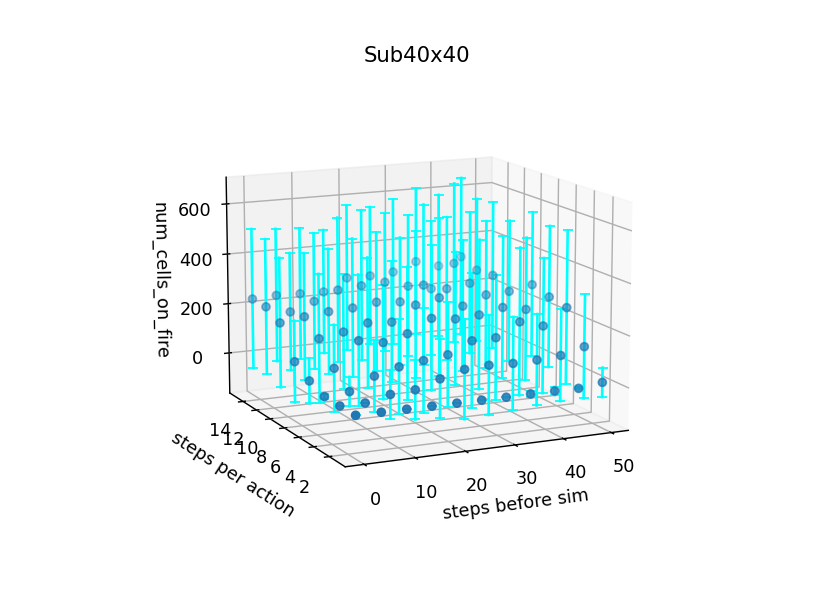

In [22]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, y_mean)
ax.set_title('Sub40x40')
ax.set_xlabel('steps before sim')
ax.set_ylabel('steps per action')
ax.set_zlabel(target_metric)

plot_errors = True
if plot_errors:
    for i in range(len(results)):
        xval, yval, zval, zerr = (x_1[i], x_2[i], y_mean[i], y_std[i])
        ax.plot([xval, xval], [yval, yval], [zval+zerr, zval-zerr], marker="_", color='cyan')